Saving international-airline-passengers.csv to international-airline-passengers (2).csv
Epoch 1/400
 - 0s - loss: 56224.7680
Epoch 2/400
 - 0s - loss: 35461.7126
Epoch 3/400
 - 0s - loss: 22867.9659
Epoch 4/400
 - 0s - loss: 12197.3293
Epoch 5/400
 - 0s - loss: 5335.5458
Epoch 6/400
 - 0s - loss: 2150.5258
Epoch 7/400
 - 0s - loss: 1239.5838
Epoch 8/400
 - 0s - loss: 1095.3587
Epoch 9/400
 - 0s - loss: 1072.7823
Epoch 10/400
 - 0s - loss: 1063.4230
Epoch 11/400
 - 0s - loss: 1049.5231
Epoch 12/400
 - 0s - loss: 1057.7520
Epoch 13/400
 - 0s - loss: 1052.6862
Epoch 14/400
 - 0s - loss: 1047.2303
Epoch 15/400
 - 0s - loss: 1045.6828
Epoch 16/400
 - 0s - loss: 1037.6622
Epoch 17/400
 - 0s - loss: 1044.8709
Epoch 18/400
 - 0s - loss: 1042.4907
Epoch 19/400
 - 0s - loss: 1078.5632
Epoch 20/400
 - 0s - loss: 1047.2491
Epoch 21/400
 - 0s - loss: 1032.2944
Epoch 22/400
 - 0s - loss: 1047.4118
Epoch 23/400
 - 0s - loss: 1063.8641
Epoch 24/400
 - 0s - loss: 1024.4901
Epoch 25/400
 - 0s - loss: 10

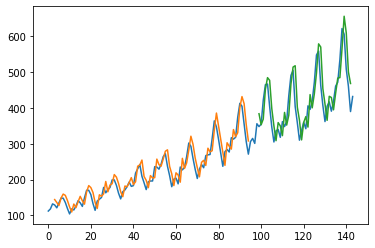

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import io

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
uploaded = files.upload()

#dataframe = pd.read_csv("international-airline-passengers.csv")
dataframe = pd.read_csv(io.BytesIO(uploaded['international-airline-passengers.csv']),usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**SARIMA**

In [ ]:
!pip install pyramid.arima
!pip install pyramid

     |████████████████████████████████| 604kB 2.8MB/s 
     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 235kB 9.6MB/s 
     |████████████████████████████████| 122kB 13.6MB/s 


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import io


from pandas import Series
from matplotlib import pyplot

Using TensorFlow backend.


In [3]:
uploaded = files.upload()
#dataframe = pd.read_csv("international-airline-passengers.csv")
df2 = pd.read_csv(io.BytesIO(uploaded['international-airline-passengers2.csv']))

Saving international-airline-passengers2.csv to international-airline-passengers2 (1).csv


In [4]:
df2.columns = ['year','passengers']
df2.head(5)

,year,passengers
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [5]:
df2.describe()

,passengers
count,143.000000
mean,281.475524
std,119.550851
min,104.000000
25%,180.500000
50%,267.000000
75%,361.000000
max,622.000000


In [6]:
df2.describe(include='O')


,year
count,143
unique,143
top,1957-06
freq,1


In [7]:
print('Time period start: {}\nTime period end: {}'.format(df2.year.min(),df2.year.max()))


Time period start: 1949-02
Time period end: 1960-12


In [8]:
df2.columns


Index(['year', 'passengers'], dtype='object')

In [9]:
df2.shape


(143, 2)

In [10]:
df2['year']

0      1949-02
1      1949-03
2      1949-04
3      1949-05
4      1949-06
        ...   
138    1960-08
139    1960-09
140    1960-10
141    1960-11
142    1960-12
Name: year, Length: 143, dtype: object

In [11]:
df2['year'] = pd.to_datetime(df2['year'], format='%Y-%m')

In [12]:
y = df2.set_index('year')
y.index


DatetimeIndex(['1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01', '1949-11-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='year', length=143, freq=None)

In [13]:
y.isnull().sum()


passengers    0
dtype: int64

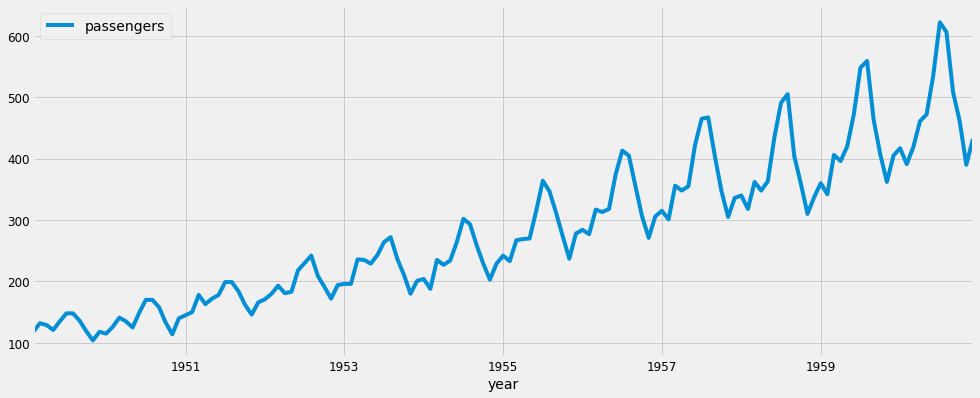

In [14]:
y.plot(figsize=(15, 6))
plt.show()

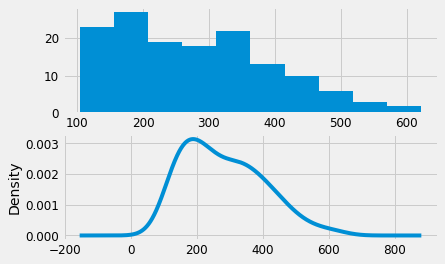

In [15]:
pyplot.figure(1)
pyplot.subplot(211)
y.passengers.hist()
pyplot.subplot(212)
y.passengers.plot(kind='kde')
pyplot.show()

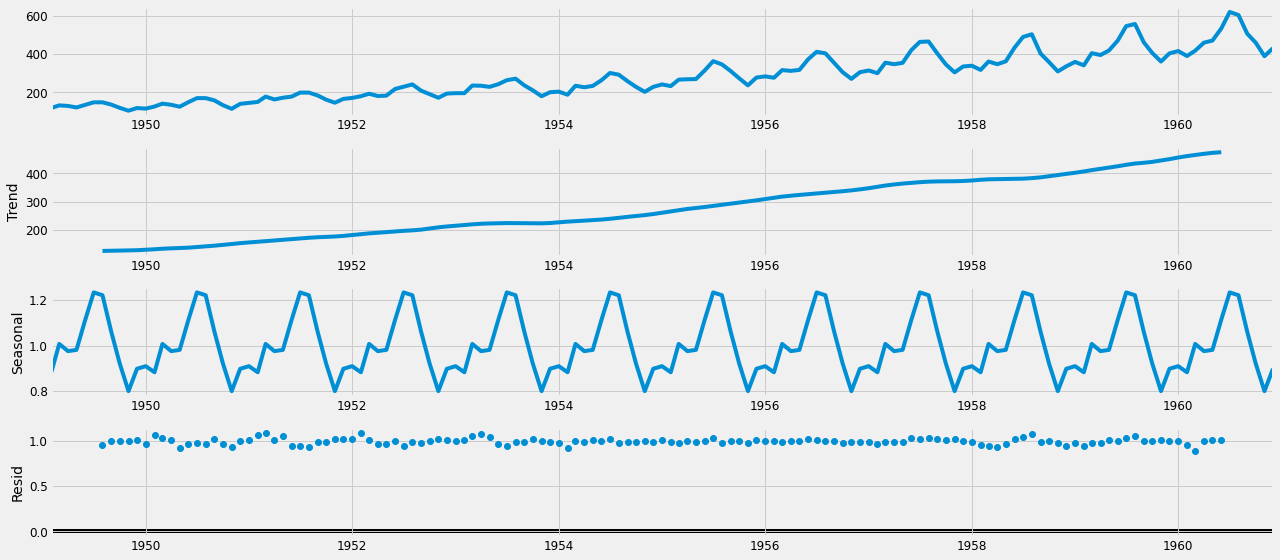

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

Se dice que una serie temporal es estacionaria si sus propiedades estadísticas, como la media, la varianza permanecen constantes en el tiempo.
La mayoría de los modelos de series temporales funcionan suponiendo que el TS es estacionario. La razón principal de esto es que hay muchas formas en que una serie puede ser no estacionaria, pero solo una forma de estacionariedad.
Intuitivamente, podemos decir que si una serie temporal tiene un comportamiento particular a lo largo del tiempo, existe una probabilidad muy alta de que siga igual en el futuro.

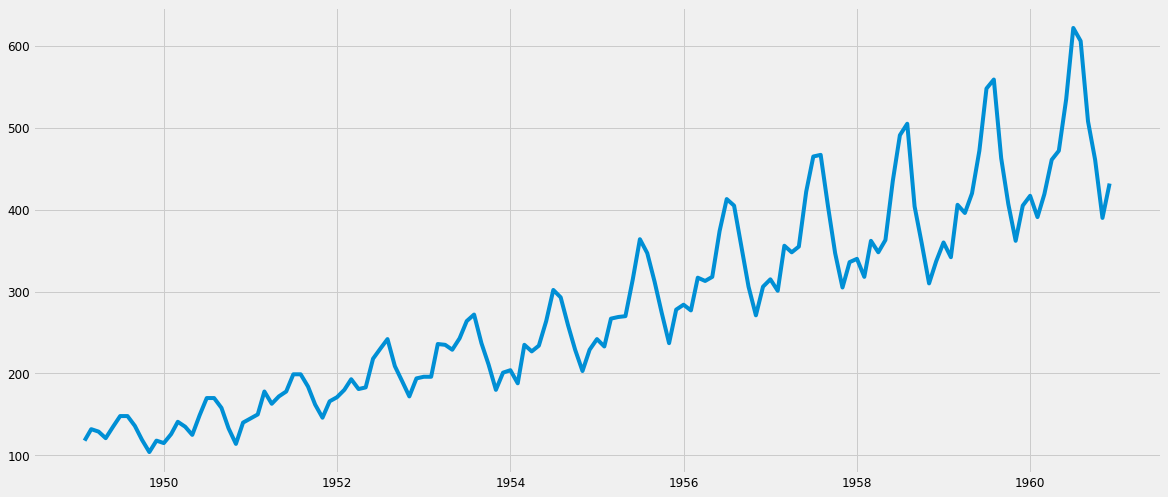

In [17]:
plt.plot(y)

Trazar estadísticas continuas
Observamos que la media móvil y la desviación estándar no son constantes con respecto al tiempo (tendencia creciente). Por lo tanto, la serie temporal no es estacionaria

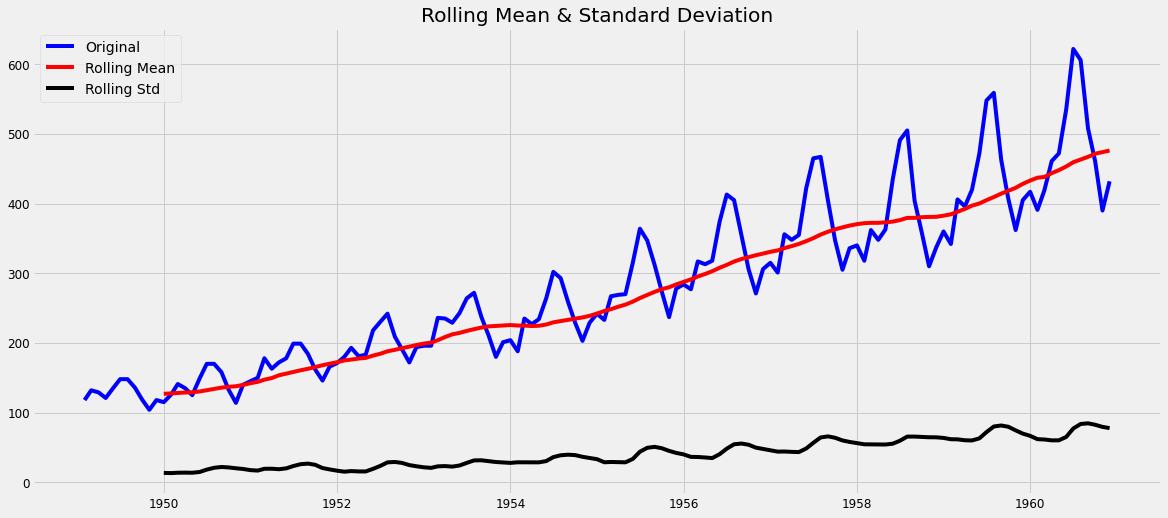

In [18]:
#Determing rolling statistics
rolmean = pd.Series.rolling(y, window=12).mean()
rolstd = pd.Series.rolling(y, window=12).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**Prueba aumentada de Dickey-Fuller**
La intuición detrás de la prueba es que si la serie está integrada, entonces el nivel rezagado de la serie y (t-1) no proporcionará información relevante para predecir el cambio en y (t).
Hipótesis nula: la serie temporal no es estacionaria Rechazar la hipótesis nula (es decir, un valor p muy bajo) indicará estacionariedad

In [19]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.passengers, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.792340
p-value                          0.991512
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [20]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

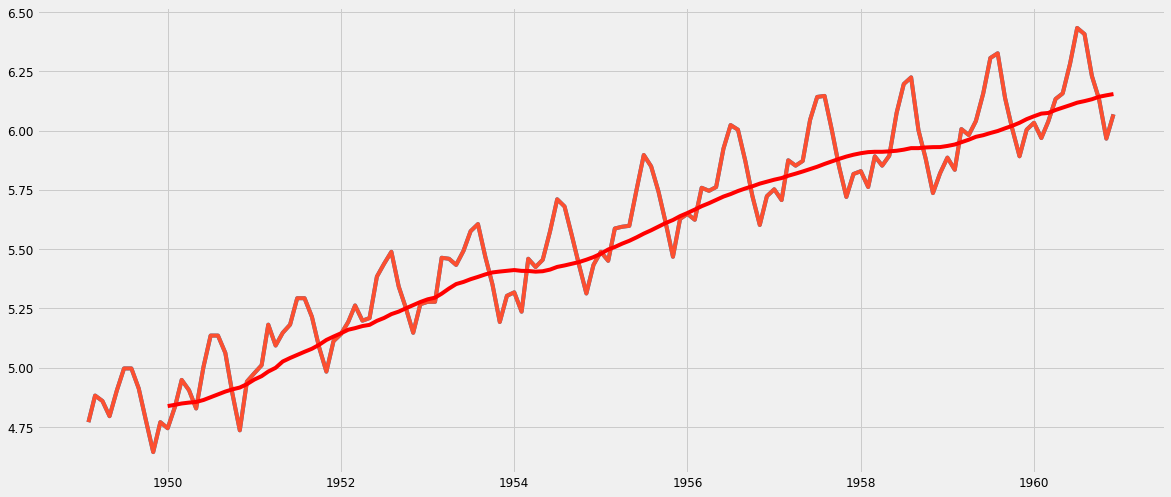

In [21]:
ts_log = np.log(y)
plt.plot(ts_log)
moving_avg = pd.Series.rolling(ts_log,12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
print(ts_log)

            passengers
year                  
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
...                ...
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426

[143 rows x 1 columns]


In [23]:
print(ts_log.passengers)

year
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: passengers, Length: 143, dtype: float64


In [24]:
print(moving_avg.passengers)

year
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
                ...   
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215
Name: passengers, Length: 143, dtype: float64


In [25]:
ts_log_moving_avg_diff = ts_log.passengers - moving_avg.passengers
ts_log_moving_avg_diff.head(12)

year
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01         NaN
1950-01-01   -0.093449
Name: passengers, dtype: float64

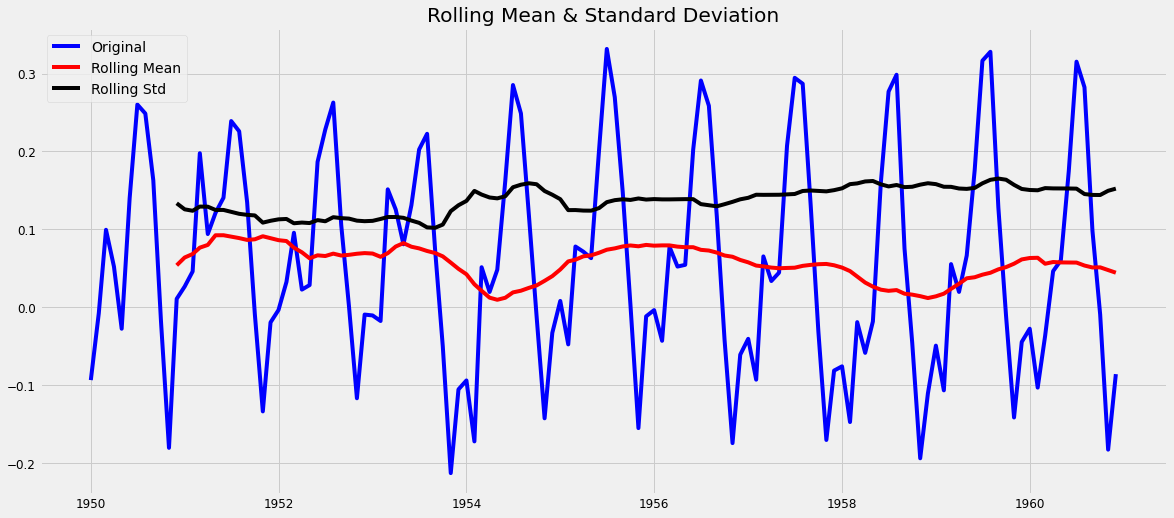

Results of Dickey-Fuller Test:
Test Statistic                  -3.151143
p-value                          0.022993
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [26]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

**Promedio ponderado exponencial**

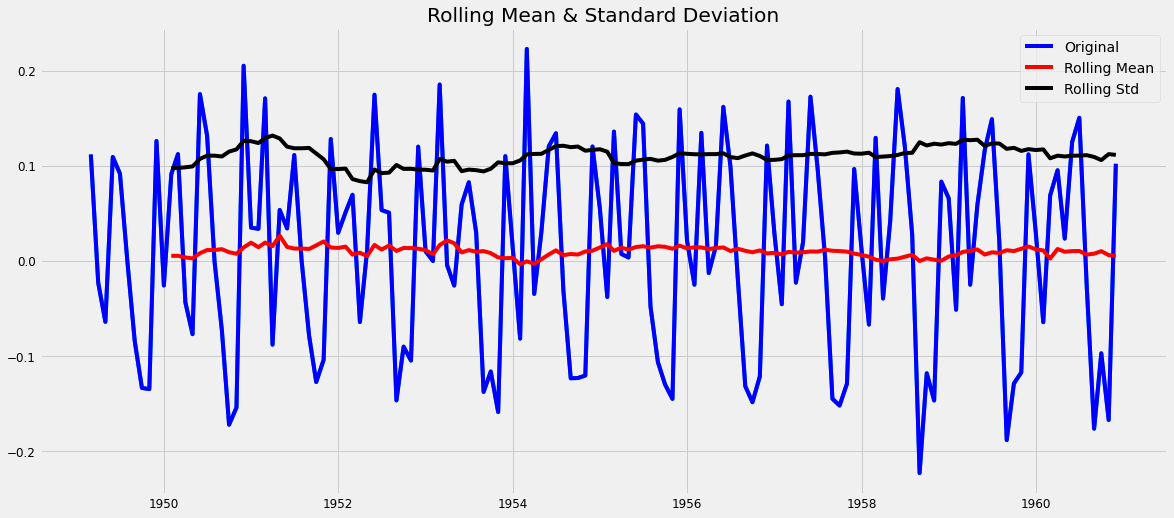

Results of Dickey-Fuller Test:
Test Statistic                  -2.877449
p-value                          0.048034
#Lags Used                      14.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


In [27]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

**Time Series forecasting**

In [28]:
from statsmodels.tsa.ar_model import AR
from random import random

In [29]:
# fit model
model = AR(ts_log_diff)
model_fit = model.fit()

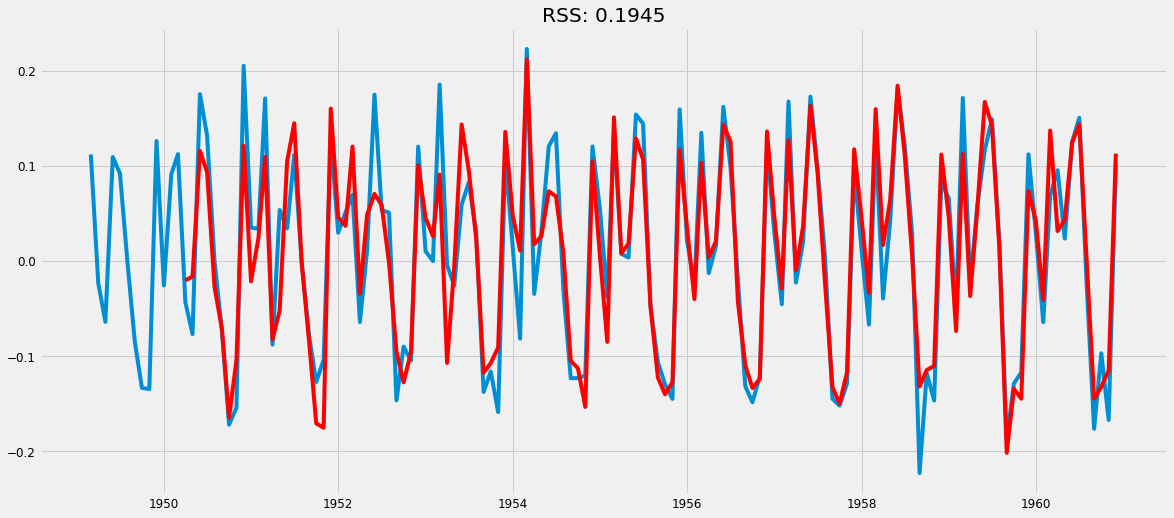

In [30]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [31]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

year
1950-04-01   -0.020411
1950-05-01   -0.016294
1950-06-01    0.115849
1950-07-01    0.093439
1950-08-01   -0.027281
dtype: float64


In [32]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

year
1950-04-01   -0.020411
1950-05-01   -0.036705
1950-06-01    0.079144
1950-07-01    0.172582
1950-08-01    0.145301
dtype: float64


In [33]:
predictions_ARIMA_log = pd.Series(ts_log.passengers.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1949-02-01    4.770685
1949-03-01    4.770685
1949-04-01    4.770685
1949-05-01    4.770685
1949-06-01    4.770685
dtype: float64

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 90.7221')

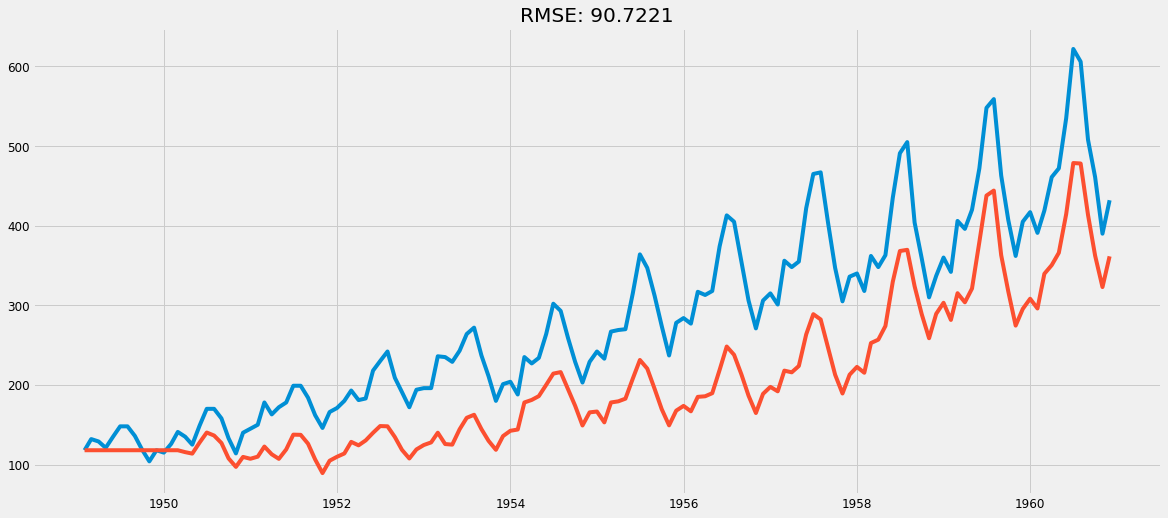

In [35]:
plt.plot(y.passengers)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-y.passengers)**2)/len(y.passengers)))

**Autoregressive Moving Average (ARMA)**

In [36]:
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(2, 1))
model_fit = model.fit(disp=False)

In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             passengers   No. Observations:                  142
Model:                     ARMA(2, 1)   Log Likelihood                 138.627
Method:                       css-mle   S.D. of innovations              0.090
Date:                Wed, 24 Jun 2020   AIC                           -267.253
Time:                        17:15:00   BIC                           -252.474
Sample:                    03-01-1949   HQIC                          -261.248
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0101      0.000     23.144      0.000       0.009       0.011
ar.L1.passengers     0.9965      0.076     13.055      0.000       0.847       1.146
ar.L2.passengers    -0.4117      0.077     -5.330      0.000      -0.563      -0.260
ma.L1.passengers    -1.0000      0.028    -35.721      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2101           -0.9820j            1.5584           -0.1085
AR.2            1.2101           +0.9820j            1.5584            0.1085
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1.1767')

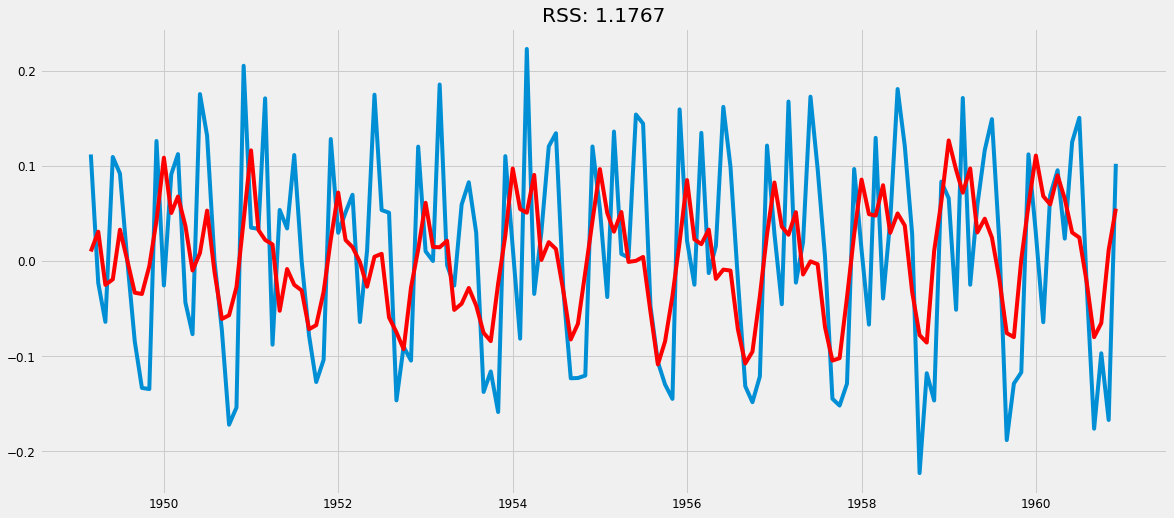

In [38]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

**Autoregressive Integrated Moving Average (ARIMA)**

In [39]:
ts = y.passengers - y.passengers.shift()
ts.dropna(inplace=True)

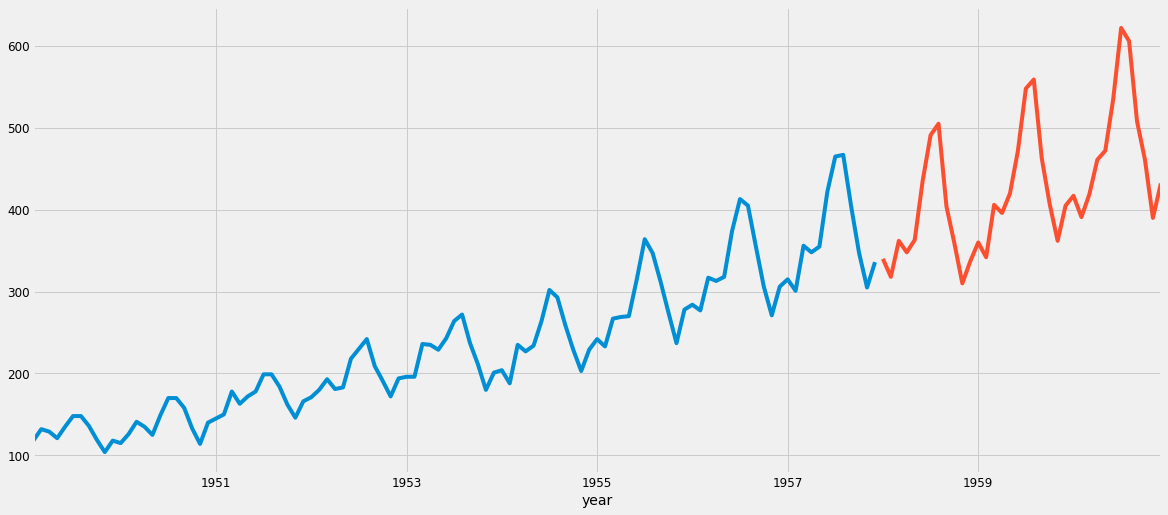

In [40]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['passengers'].plot()
valid['passengers'].plot()

In [41]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=1)

In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  106
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -489.127
Method:                       css-mle   S.D. of innovations             24.100
Date:                Wed, 24 Jun 2020   AIC                            986.254
Time:                        17:15:17   BIC                            996.908
Sample:                    03-01-1949   HQIC                           990.572
                         - 12-01-1957                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4363      0.270      9.020      0.000       1.907       2.966
ar.L1.D.passengers     0.7410      0.068     10.922      0.000       0.608       0.874
ma.L1.D.passengers    -0.9999      0.026    -39.047      0.000      -1.050      -0.950
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3496           +0.0000j            1.3496            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

In [44]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 432.6251086060084, MSE:187164.48459636056


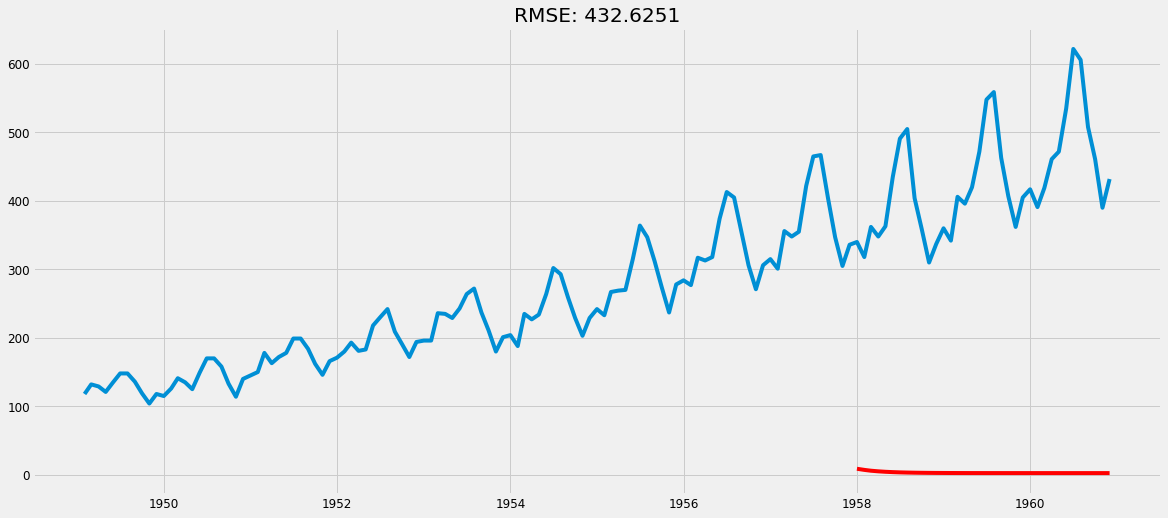

In [45]:
plt.plot(y.passengers)
plt.plot(predictions, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()


**Auto - SARIMA**

In [94]:
!pip install pyramid-arima

In [96]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 16.3MB/s 
     |████████████████████████████████| 2.1MB 46.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20


In [55]:
import pyramid as pm
pm.__version__

AttributeError: ignored

In [53]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


AttributeError: ignored